In [1]:
root_folder = '/content/drive/MyDrive/магистратура/Обработка и анализ изображений/other/'

In [2]:
from copy import deepcopy
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [3]:
def print_img(img, title = '', shape = (12,9)):
  plt.figure(figsize = shape)
  plt.title(title)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

def print_img_grey(img, title = '', shape = (12,9)):
  plt.figure(figsize = shape)
  plt.title(title)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))


def reverse_shape(shape):
  result = []
  for i in range(len(shape)):
    result.append(shape[len(shape)-i-1])
  return(tuple(result))

def distance(x1,y1,x2,y2):
  return(pow((x1-x2)**2+(y1-y2)**2,0.5))


## Задание 1

In [4]:
img_1 = cv2.imread(root_folder+'lines.jpg')

In [5]:
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)

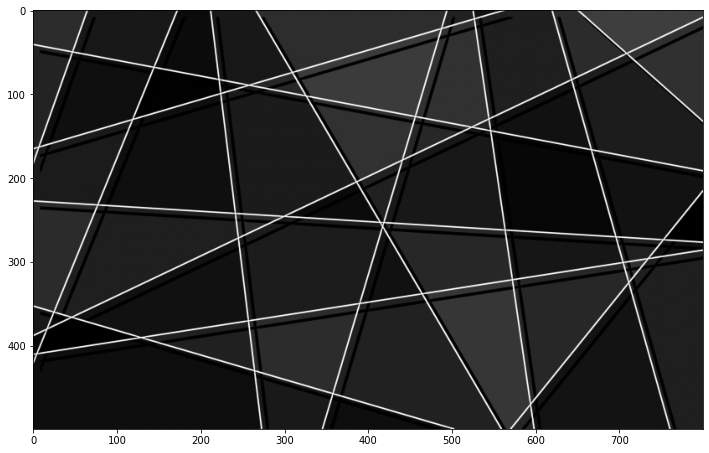

In [6]:
print_img(img_1)

In [7]:
# img_filtred = cv2.blur(img_1,(1,1))
kernel = np.array([[-1,-1,-1,-1],
                  [-1,2,2,-1],
                  [-1,2,2,-1],
                  [-1,-1,-1,-1]])
img_filtred = cv2.filter2D(img_1, -1,kernel).astype(np.uint8)
img_filtred = cv2.blur(img_filtred,(3,3))
img_filtred = cv2.Canny(img_filtred,50,150,apertureSize = 3)
kernel_2 = np.array([[1,1,1],
                     [1,2,1],
                     [1,1,1]])
img_filtred = cv2.filter2D(img_filtred, -1,kernel_2).astype(np.uint8)

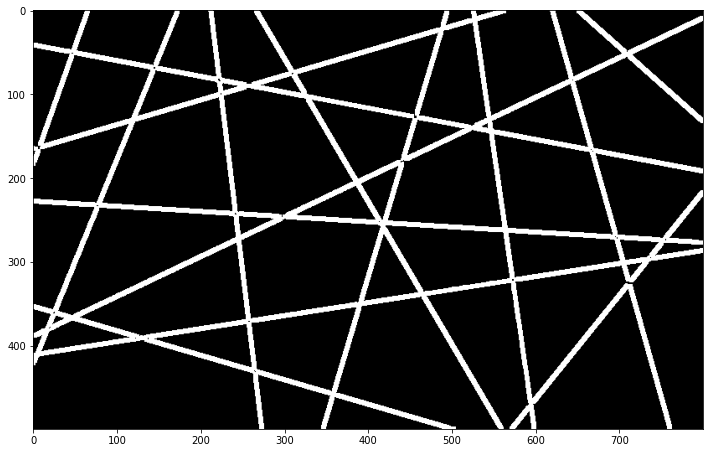

In [8]:
print_img(img_filtred)

In [9]:
draw = cv2.imread(root_folder+'lines.jpg')
lines = cv2.HoughLinesP(img_filtred, 1, np.pi/180, 120, 200, 3)
for x1,y1,x2,y2 in lines.reshape(-1,4):
  draw = cv2.line(draw,(x1,y1),(x2,y2),(0,255,0),1)


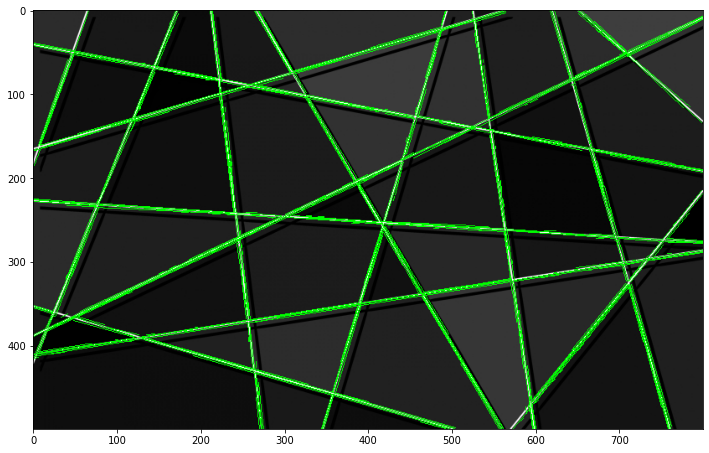

In [10]:
print_img(draw)

## Задание 2

In [11]:
img_2 = cv2.imread(root_folder+'skyskeb_one.jpg')

In [27]:
img_2_gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

In [57]:
img_2_blur = cv2.blur(img_2_gray, (11,11))
img_2_canny = cv2.Canny(img_2_blur,50,150,apertureSize = 3)
img_2_canny = cv2.blur(img_2_canny, (9,9))

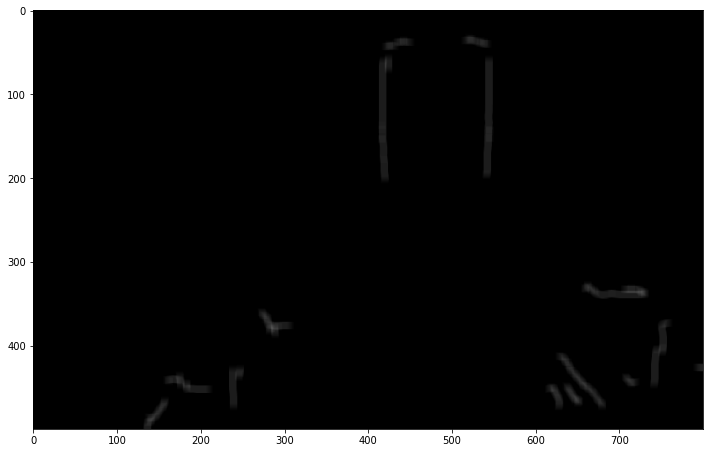

In [58]:
print_img(img_2_canny)

In [59]:
kernel_2 = np.array([[1,1,1],
                     [1,2,1],
                     [1,1,1]])
img_2_filtred = cv2.filter2D(img_2_canny, -1,kernel_2).astype(np.uint8)

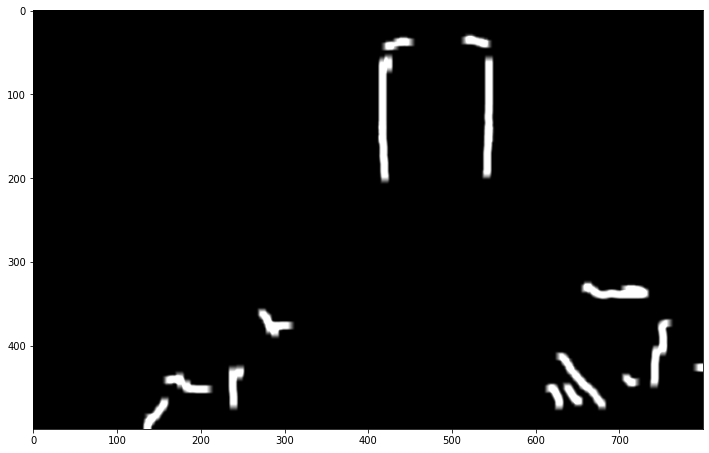

In [60]:
print_img(img_2_filtred)

In [91]:
draw = cv2.imread(root_folder+'skyskeb_one.jpg')
lines = cv2.HoughLines(img_2_filtred,1,np.pi/180,165)
multiplier = 1000
for line in lines:
  [rho, theta] = line[0]
  a = np.cos(theta)
  b = np.sin(theta)
  x0 = a*rho
  y0 = b*rho
  if y0 < 50 and x0 >300:
    x1 = int(x0 + multiplier*(-b))
    y1 = int(y0 + multiplier*(a))
    x2 = int(x0 - multiplier*(-b))
    y2 = int(y0 - multiplier*(a))
    draw = cv2.line(draw,(x1,y1),(x2,y2),(0,255,0),2)

In [92]:
len(lines)

9

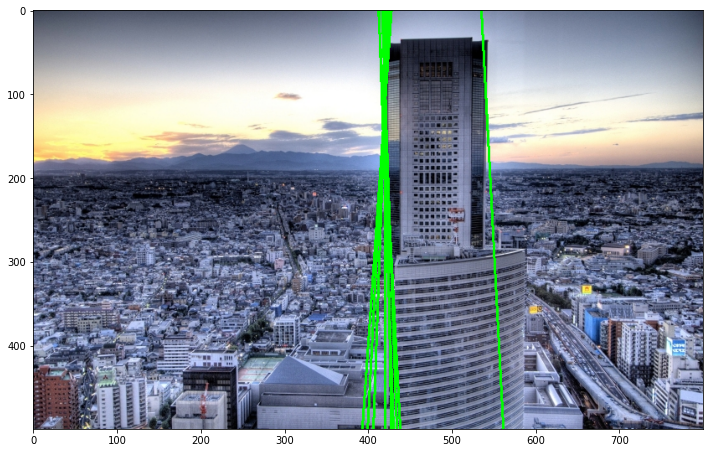

In [93]:
print_img(draw)

## Задание 3

In [ ]:
img_3 = cv2.imread(root_folder+'square_many2.jpg')
img_3_gray = img_3.astype(np.uint8)
template = img_3_gray[12:48, 289:325]
weight, height = template.shape[:2][::-1]

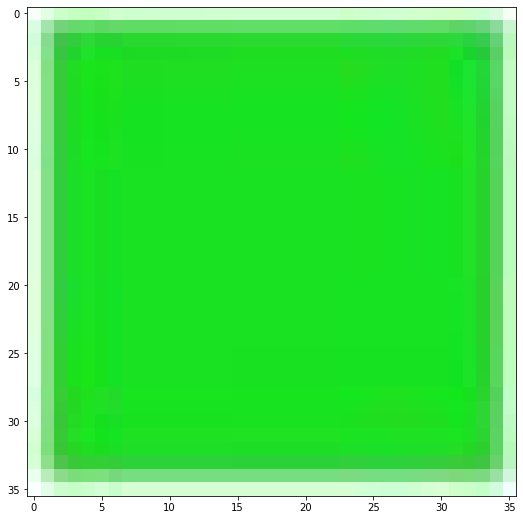

In [ ]:
print_img(template)

In [ ]:
matching = cv2.matchTemplate(img_3_gray,template,cv2.TM_CCOEFF_NORMED)

In [ ]:
threshold = 0.9
loc = np.where( matching >= threshold)

In [ ]:
draw = deepcopy(img_3)
output_set = set()
for pt in zip(*loc[::-1]):
    draw = cv2.rectangle(draw, pt, (pt[0] + weight, pt[1] + height), (0,0,0), 2)
    sensitivity = 70
    output_set.add((round(pt[0]/sensitivity), round(pt[1]/sensitivity)))

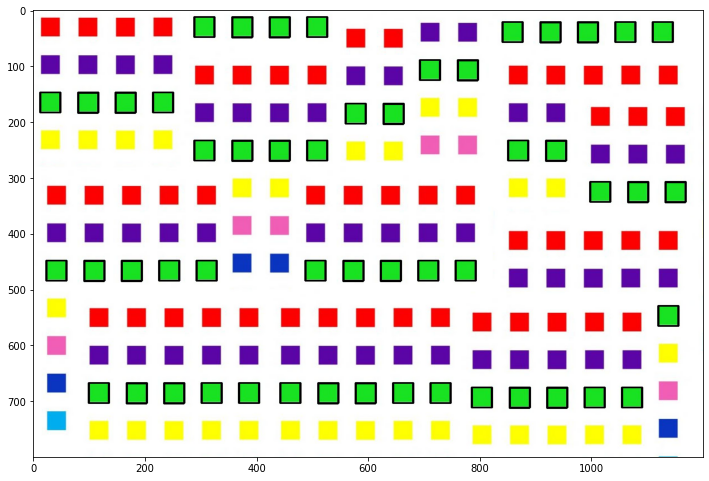

In [ ]:
print_img(draw)

In [ ]:
len(output_set)

52